## Extracción de datos de Twitter usando tweepy y mostrar cómo gestionarlos usando pandas

In [ ]:
# !pip install tweepy

In [2]:
# General:
import tweepy          # Para consumir la API de Tweeter
import pandas as pd    # Para análisis de datos
import numpy as np  # Para cálculo numérico, también se puede usar como contenedor multidimensional eficiente de datos genéricos

In [4]:
# Para visualización con gráficos:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
# Importamos nuestras claves de acceso:

# Crear archivo credentials.py e ingresar las llaves de la api de Twitter
    # CONSUMER_KEY = ''
    # CONSUMER_SECRET = ''
    # ACCESS_TOKEN = ''
    # ACCESS_SECRET = ''
    
from credentials import *    # Esto nos permite usar las claves como variables

In [6]:
# Configuración de la API:
def twitter_setup():
    """
    Función de utilidad para configurar la API de Twitter
    con nuestras claves de acceso.
    """
    # Autenticación y acceso usando claves:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Retornar API con autenticación:
    api = tweepy.API(auth)
    return api

In [7]:
# Creamos un objeto extractor:
extractor = twitter_setup()

# Creamos una lista de tweets:
tweets = extractor.user_timeline(screen_name="bbva_peru", count=200)  
print("Número de tweets extraidos: {}\n".format(len(tweets)))

# Imprimimos los 5 tweets más recientes:
print("5 tweets más recientes:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Número de tweets extraidos: 200

5 tweets más recientes:

@JBalarezoB Hola José, realmente lamentamos el malestar ocasionado; asimismo, agradeceríamos nos facilites tus dato… https://t.co/LpNFuf0TK9

@mariana30158 Hola Mariana, estamos reiterando tu solicitud con nuestra área encargada. ¡Saludos!

@juanc_hurtadog Hola Juan, realmente lamentamos el malestar ocasionado; asimismo, agradeceríamos nos facilites tus… https://t.co/QryWTsaCms

@Solangenu Hola Solange, lamentamos el malestar generado. Por favor, bríndanos tus datos por mensaje interno para c… https://t.co/IA7pTGf7c1

@Pd2o1405 Hola Pd2O, estamos atendiendo tu consulta por mensaje interno. ¡Saludos!



In [12]:
# Creamos una dataframe de pandas:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# Dibujamos los 10 primeros elementos del dataframe:
data.head(10)

,Tweets
0,"@JBalarezoB Hola José, realmente lamentamos el..."
1,"@mariana30158 Hola Mariana, estamos reiterando..."
2,"@juanc_hurtadog Hola Juan, realmente lamentamo..."
3,"@Solangenu Hola Solange, lamentamos el malesta..."
4,"@Pd2o1405 Hola Pd2O, estamos atendiendo tu con..."
5,"@Fasabi01 Hola Fasabi, lamentamos la mala expe..."
6,@adoptaES Gracias a ti por escribirnos. ¡Que t...
7,"@adoptaES Hola, te comentamos que si la transf..."
8,"@ChristiamAndia Hola Christiam, seguimos con l..."
9,"@mariana30158 Mariana, acabamos de tomar todos..."


In [9]:
# Métodos internos de un objeto tweet:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [13]:
# Imprimimos la información del primer tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].entities)

1159864943224795137
2019-08-09 16:32:06
S1Gateway
0
0
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'JBalarezoB', 'name': 'José Balarezo B.', 'id': 1898942472, 'id_str': '1898942472', 'indices': [0, 11]}], 'urls': [{'url': 'https://t.co/LpNFuf0TK9', 'expanded_url': 'https://twitter.com/i/web/status/1159864943224795137', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


In [15]:
# Añadimos los datos relevantes:
data['longitud']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Fecha'] = np.array([tweet.created_at for tweet in tweets])
data['Fuente'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

# Mostramos los 10 primeros elementos del dataframe:
data.head(10)

,Tweets,longitud,ID,Fecha,Fuente,Likes,RTs
0,"@JBalarezoB Hola José, realmente lamentamos el...",140,1159864943224795137,2019-08-09 16:32:06,S1Gateway,0,0
1,"@mariana30158 Hola Mariana, estamos reiterando...",97,1159861249754243074,2019-08-09 16:17:25,S1Gateway,1,0
2,"@juanc_hurtadog Hola Juan, realmente lamentamo...",139,1159535759344504837,2019-08-08 18:44:02,S1Gateway,1,0
3,"@Solangenu Hola Solange, lamentamos el malesta...",140,1159531142447534081,2019-08-08 18:25:42,S1Gateway,0,0
4,"@Pd2o1405 Hola Pd2O, estamos atendiendo tu con...",82,1159504541483749383,2019-08-08 16:39:59,S1Gateway,0,0
5,"@Fasabi01 Hola Fasabi, lamentamos la mala expe...",140,1159492750540267520,2019-08-08 15:53:08,S1Gateway,0,0
6,@adoptaES Gracias a ti por escribirnos. ¡Que t...,69,1159474457020391424,2019-08-08 14:40:27,S1Gateway,0,0
7,"@adoptaES Hola, te comentamos que si la transf...",140,1159473281327665154,2019-08-08 14:35:46,S1Gateway,0,0
8,"@ChristiamAndia Hola Christiam, seguimos con l...",112,1159259798552137732,2019-08-08 00:27:28,S1Gateway,0,0
9,"@mariana30158 Mariana, acabamos de tomar todos...",139,1159194884605173760,2019-08-07 20:09:31,S1Gateway,0,0


### Estadisticas

In [19]:
# Sacamos la media de las longitudes:
mean = np.mean(data['longitud'])

print("La longitud media de los tweets: {}".format(mean))

La longitud media de los tweets: 123.82


In [33]:
# Sacamos el tweet con más "Me gusta" y el más retuiteado:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Tweet que más ha gustado:
print("El tweet con más <Me gusta> es: \n{}".format(data['Tweets'][fav]))
print("Número de <Me gusta>: {}".format(fav_max))
print("{} caracteres.\n".format(data['longitud'][fav]))

# Tweet más retuiteado:
print("El tweet más retuiteado es: \n{}".format(data['Tweets'][rt]))
print("Número de retweets: {}".format(rt_max))
print("{} caracteres.\n".format(data['longitud'][rt]))

El tweet con más <Me gusta> es: 
¿Qué se te viene a la cabeza cuando hablamos de 'orgullo peruano'? Para @rominantoniazzi son muchos recuerdos con l… https://t.co/nTUsgpKYqA
Número de <Me gusta>: 94
140 caracteres.

El tweet más retuiteado es: 
Ya son campeones ❤️

#BancoDeLaSeleccion https://t.co/le9mYyKytG
Número de retweets: 17
64 caracteres.



### Visualización

In [34]:
# Creamos las series temporales de datos de los tweets:
tlen = pd.Series(data=data['longitud'].values, index=data['Fecha'])
tfav = pd.Series(data=data['Likes'].values, index=data['Fecha'])
tret = pd.Series(data=data['RTs'].values, index=data['Fecha'])

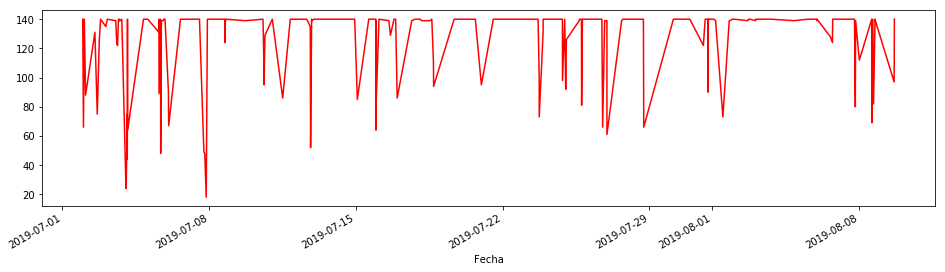

In [42]:
# Variación de las longitudes de tweets con el tiempo:
tlen.plot(figsize=(16,4), color='r');

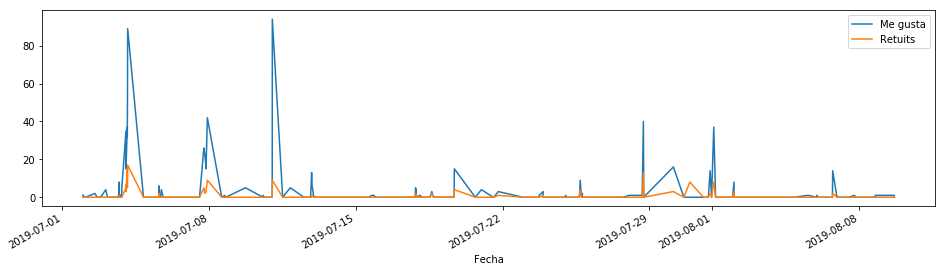

In [43]:
# Visualización de Me gusta vs Retuits, en el mismo gráfico:
tfav.plot(figsize=(16,4), label="Me gusta", legend=True)
tret.plot(figsize=(16,4), label="Retuits", legend=True);

In [48]:
# Ahora voy a visualizar las fuentes en un gráfico de tarta

# Obtener todas las fuentes posibles:
fuentes = []
for fuente in data['Fuente']:
    if fuente not in fuentes:
        fuentes.append(fuente)

# Imprimir la lista de fuentes:
print("Creación de fuentes de contenido:")
for fuente in fuentes:
    #print("* {}".format(fuente))
    print("* " + fuente)

Creación de fuentes de contenido:
* S1Gateway
* Twitter Web App
* Twitter for iPhone
* Twitter Web Client


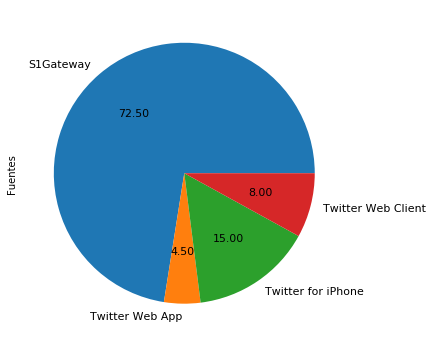

In [56]:
# Creamos un vector numpy mapeado a las etiquetas:
percent = np.zeros(len(fuentes))

for fuente in data['Fuente']:
    for indice in range(len(fuentes)):
        if fuente == fuentes[indice]:
            percent[indice] += 1

percent /= 100

# Gráfico de tarta:
tarta = pd.Series(percent, index=fuentes, name='Fuentes')
tarta.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));